# EDA on Student Study Performance
- https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance

### Introduction to data
- This data set consists of the marks secured by the students in various subjects.

- gender : sex of students -> (male or female)
- race/ethnicity : ethnicity of students -> (Group A, B, C, D, E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree, associate's degree, high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

## 0. Import dependencies

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

## 1. Choose publicly available data

In [90]:
df = pd.read_csv('./data/study_performance.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [91]:
df.shape

(1000, 8)

## 2. Explain the details of the data I selected

### Explanation:
- This dataset has 8 columns.
- This dataset has 1000 rows.
- 3 columns are interger data type.
- 5 columns are object data type.
- Columms name are following:
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
'test_preparation_course', 'math_score', 'reading_score',
'writing_score']

In [92]:
display(df)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [94]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [95]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [96]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [97]:
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [99]:
df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [100]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

## 3. Data Preprocessing
- Perform data cleaning
- data transformation
- data normalization

### Check missing values of this dataset

In [101]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

- This dataset has no missing value

### Check the duplicates values

In [102]:
df.duplicated().sum()

0

- This dataset has no duplicates values

In [103]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['mean_score'] = round(df['total_score'] / 3, 2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,mean_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [104]:
df = df.rename(columns = {'race_ethnicity' : 'group',
                          'parental_level_of_education' : 'parent_education_level',
                          'test_preparation_course' : 'test_preparation'})
df.head()

,gender,group,parent_education_level,lunch,test_preparation,math_score,reading_score,writing_score,total_score,mean_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


### Convert the some high school to high school

In [105]:
# some high school replace with high school
df['parent_education_level'] = df['parent_education_level'].replace('some high school', 'high school')
df['parent_education_level'].value_counts()

parent_education_level
high school           375
some college          226
associate's degree    222
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

## 4. Data Visualization
- Create basic and statistical charts

### Q1. Check the distribution of gender

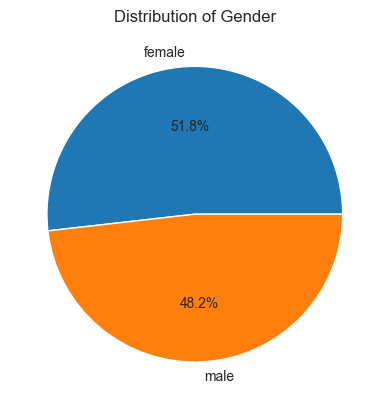

In [124]:
count_gender = df['gender'].value_counts()
gender = count_gender.index

plt.title('Distribution of Gender')
plt.pie(count_gender, labels = gender, autopct='%.1f%%')
plt.show()

### Q2. Check the counts of test_preparation by gender

<Axes: xlabel='test_preparation', ylabel='Count'>

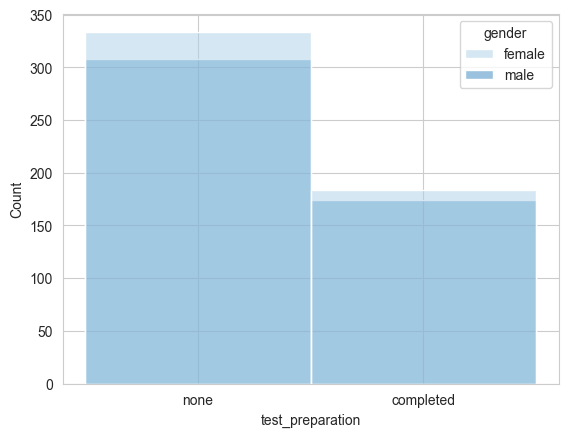

In [109]:
sns.histplot(x='test_preparation', 
    data = df, 
    hue='gender',
    palette='Blues')

### Q3. Check the counts of lunch by gender

<Axes: xlabel='gender', ylabel='count'>

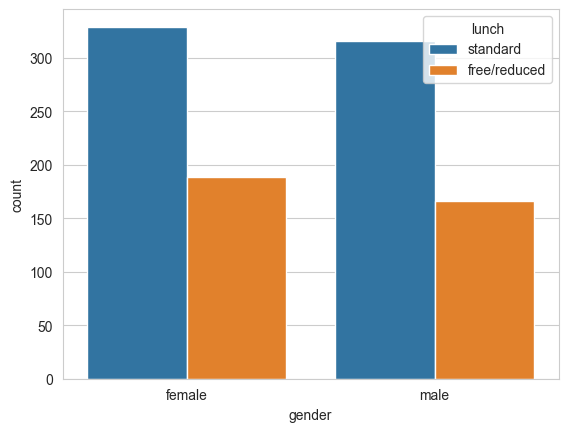

In [71]:
sns.countplot(data = df, x = 'gender', hue = 'lunch')

### Q4. Check the distributions of all score

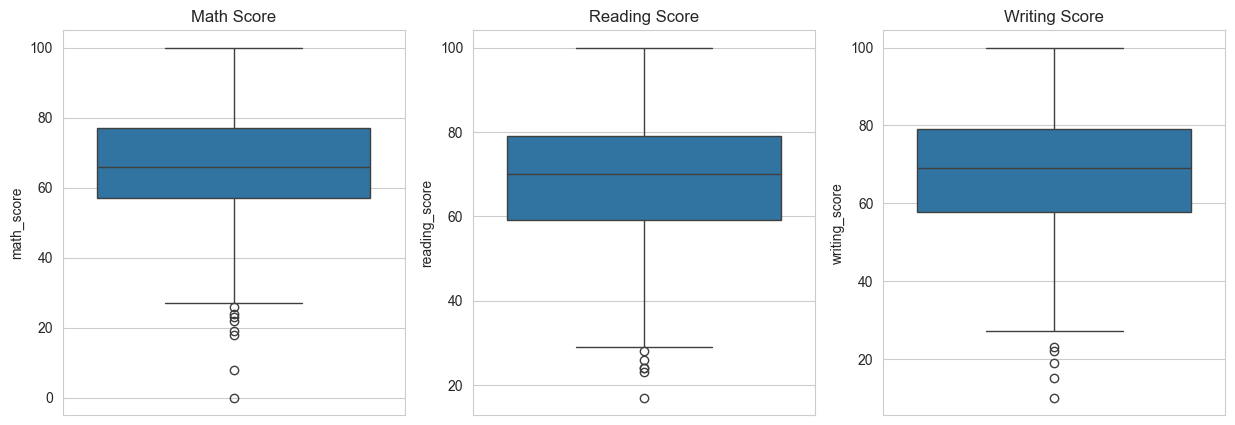

In [67]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='math_score')
plt.title('Math Score')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='reading_score')
plt.title('Reading Score')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, y='writing_score')
plt.title('Writing Score')

plt.show()

### Q5. Check scatter plot of scores between each subject

<Axes: xlabel='reading_score', ylabel='writing_score'>

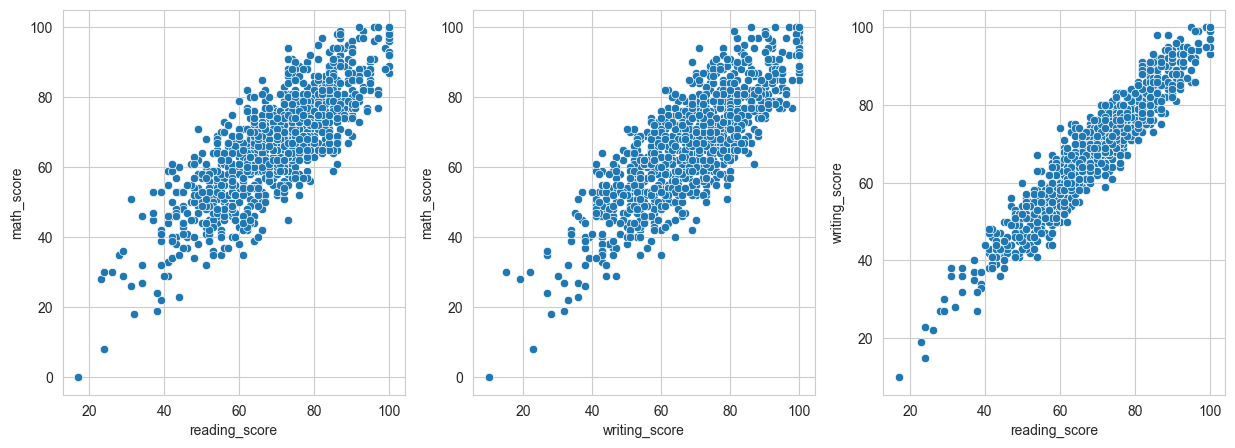

In [125]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data = df, x = 'reading_score', y = 'math_score')

plt.subplot(1, 3, 2)
sns.scatterplot(data = df, x = 'writing_score', y = 'math_score')

plt.subplot(1, 3, 3)
sns.scatterplot(data = df, x = 'reading_score', y = 'writing_score')

### Q6. Check correlation heatmap

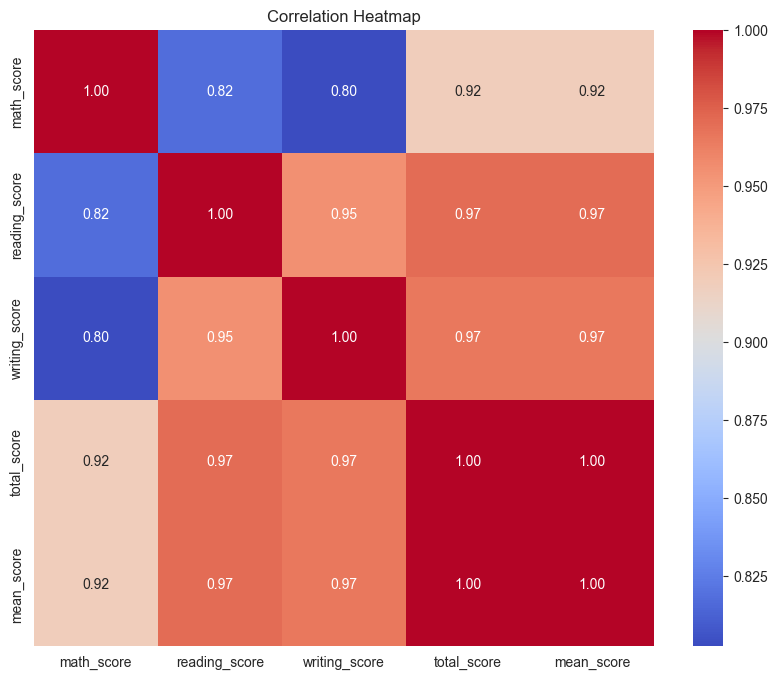

In [76]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Q7. Check the distribution of parent education level

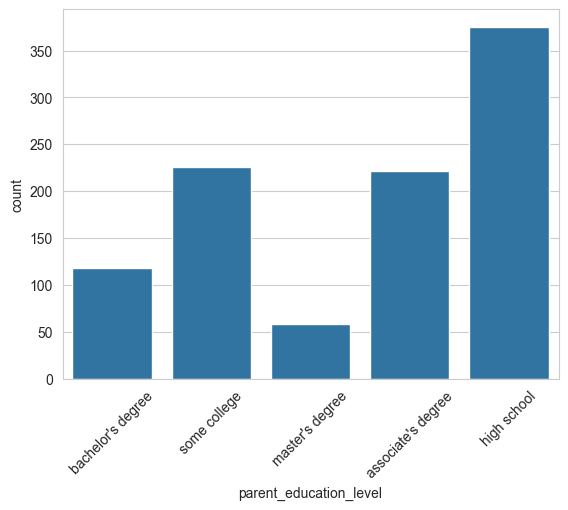

In [126]:
sns.countplot(data = df, x = 'parent_education_level')
plt.xticks(rotation = 45)
plt.show()

### Q8. Check the violin plot of scores by subject based on parents' education level

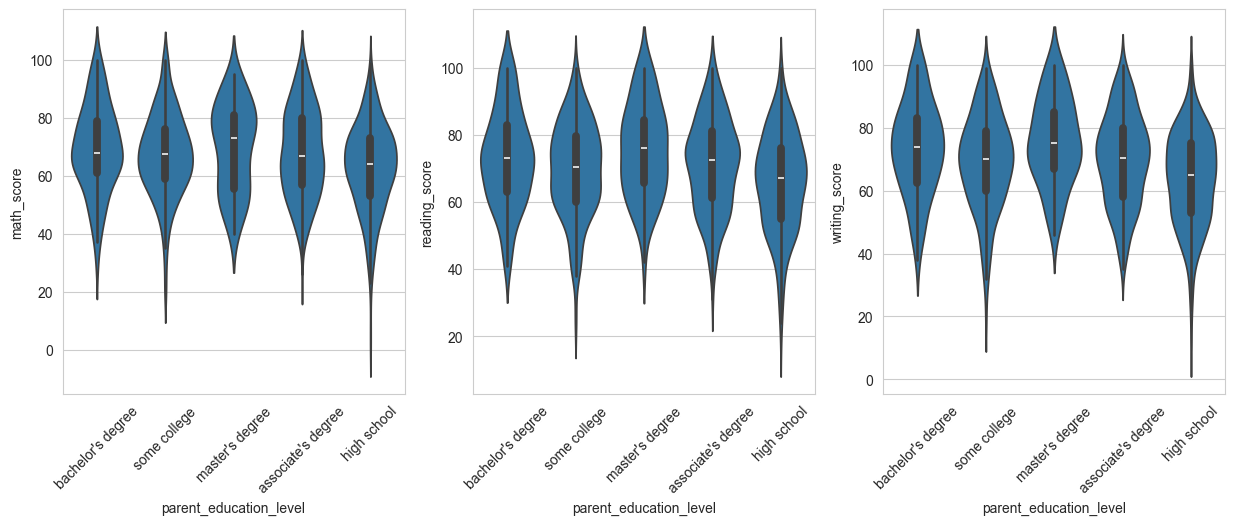

In [146]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.violinplot(x = 'parent_education_level', y='math_score', data=df)
plt.xticks(rotation = 45)

plt.subplot(1, 3, 2)
sns.violinplot(x = 'parent_education_level', y='reading_score', data=df)
plt.xticks(rotation = 45)

plt.subplot(1, 3, 3)
sns.violinplot(x = 'parent_education_level', y='writing_score', data=df)
plt.xticks(rotation = 45)

plt.show()

### Q9. Check the distribution of average score by parental education level

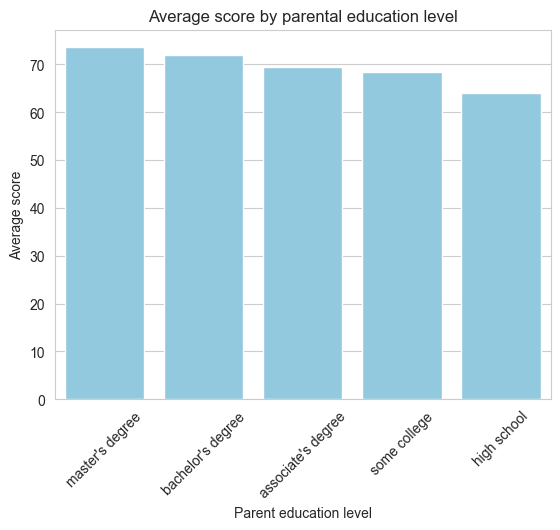

In [145]:
mean_scores = df.groupby('parent_education_level')['mean_score'].mean().round(2).sort_values(ascending=False)

sns.barplot(x=mean_scores.index, y=mean_scores.values, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Parent education level')
plt.ylabel('Average score')
plt.title('Average score by parental education level')
plt.show()

### Q10. Check the distribution of average score by gender

<Axes: xlabel='mean_score', ylabel='Count'>

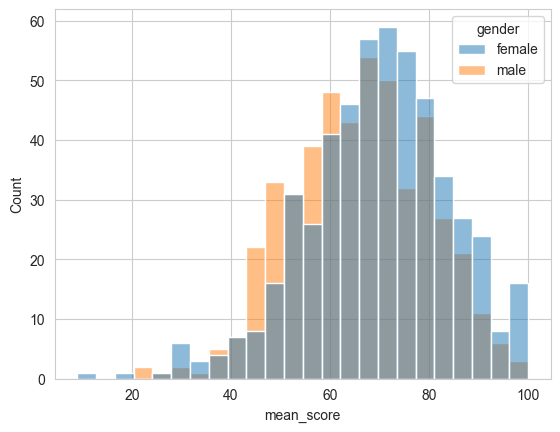

In [140]:
sns.histplot(data = df, x = 'mean_score', hue = 'gender')

## Data Manipulation
- I used data frame manipulation for Tasks 3 and 4.

## Summary